# Descision Tree
## Objective

As a result of completing this exercise you should be able to:

- Understand the concept of Classification
- Understand the concept of Decision Tree
- Load real-world data from `scikit-learn` datasets
- Load external data using `pandas`
- Process external data to the proper format for `scikit-learn` learning models
- Use `scikit-learn` to implement a Decision Tree classification
- Display decision boundary using `matplotlib`
- Display tree structure using `scikit-learn` and `pydotplus`

## Import Libraries

Do this, if you prefer to import all the packages together in beginning of the notebook, and remember to run this cell first every time before you run other cells that need packages.

If you prefer to import packages one by one later, you can skip this section. Do remember to import packages when you need to use them in the latter cells.

In [1]:
# import packages for future use in this notebook
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree


import warnings
warnings.filterwarnings('ignore')

### Define a function to visualize the decision regions or decision bounaries 

In [2]:
# import necessary packages and methods
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

## Classification - Examples

<a name="eg1"></a>
### Example 1 - Decision Tree with a Built-in Dataset (Iris)

<a name="eg1-preprocess"></a>
#### Preprocessing

[back to exercise 1](#ex1)

##### Load data

In [3]:
# if you haven't loaded the package before, import the packages and methods
from sklearn import datasets
import numpy as np

# load data
iris = datasets.load_iris()

In [4]:
# check the features
print(iris.data.shape)
print(iris.data)

(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6

In [5]:
# check the label (target)
print(iris.target.shape)
print(iris.target)

(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
# assign the features and target values to variables
# use only two features for display the classification boundry on a 2D plot 
X = iris.data[:, [2, 3]]
y = iris.target

# cheking the dimension of features and uniqule labels
print('Feature dimension:', X.shape)
print('Class labels:', np.unique(y))

Feature dimension: (150, 2)
Class labels: [0 1 2]


In [7]:
# double check values in the variables
# features and target of the first two instances
print(X[[1,2],:])
print(y[:2])

[[1.4 0.2]
 [1.3 0.2]]
[0 0]


##### Split training samples into training set and test set

In [8]:
# load necessary package and methods, if you havne't
from sklearn.model_selection import train_test_split

# split the training data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [9]:
# cheking the data and sets
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


<a name="eg1-learning"></a>
#### Learning - Training a Decision Tree Classification model
Fit or train a decision tree classification model

[back to exercise 1](#ex1)

In [11]:
# load necessary package and methods, if you havne't
from sklearn.tree import DecisionTreeClassifier

# build a Decision Tree model
# set the classifier
tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)

# fit the classifier from training set
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

<a name="eg1-predict"></a>
#### Prediction
Predict the label or class for new x values (or new features)

[back to exercise 1](#ex1)

In [12]:
tree_model.predict([[5, 2]])

array([2])

In [13]:
# predict the sepcies of an Iris flower, which is the 5th instance in the test set
# show the features of the 5th flower
print(X_test[4])

# predict the target value (class label or speices) of the 5th flower use the features of that flower
y_hat = tree_model.predict(X_test[4].reshape(-1,2))

# compare the true label and predicted label
print("True label:", y_test[4], "vs. Predict label:", y_hat)

[4.4 1.4]
True label: 1 vs. Predict label: [1]


#### Presentation: Plot the Decision Region or Decision Boundaries of Decision Tree Classification

This is not a standard machine learning steps. It shows a visualziation of our decsition tree classification output.

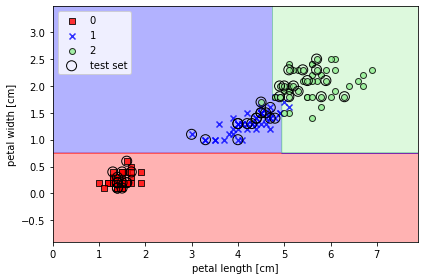

In [14]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_model,
                      test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('images/example.png', dpi=600)
plt.show()

<a name="eg1-present1"></a>
#### Presentation: Display the Decision Tree Model
This is not a standard machine learning steps. It shows a visualziation of our decsition tree classification output.

[back to exercise 1](#ex1)

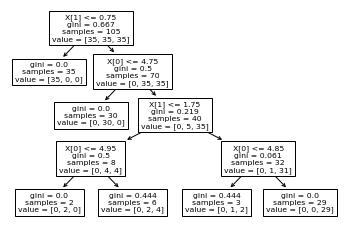

In [15]:
# load necessary package and methods, if you havne't
from sklearn import tree
import matplotlib.pyplot as plt

# plot the tree
tree.plot_tree(tree_model)
# save the plot into a pdf file
plt.savefig('images/tree_model_iris.pdf')
# show the plot on the screen
plt.show()

<a name="eg1-present2"></a>
#### Presentation: Display a Fancy Decision Tree Model with Class or Label Names
This is not a standard machine learning steps. It shows a visualziation of our decsition tree classification output.

[back to exercise 1](#ex1)

In [16]:
# if you have already installed graphviz package, please skip the step
# if you haven't installed graphviz, please follow the step below
#pip install graphviz
import sys
!{sys.executable} -m pip install graphviz

# or
#import sys
#!conda install --yes --prefix {sys.prefix} graphviz


In [17]:
# if you have already installed pydotplus package, please skip the step
# if you haven't installed pydotplus, please follow the step below
#pip install pydotplus
import sys
!{sys.executable} -m pip install pydotplus

#import sys
#!conda install --yes --prefix {sys.prefix} pydotplus

^C


In [18]:
# load necessary package and methods, if you havne't
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

# set the graph
dot_data = export_graphviz(tree_model,
                           filled=True, 
                           rounded=True,
                           class_names=['Setosa', 
                                        'Versicolor',
                                        'Virginica'],
                           feature_names=['petal length', 
                                          'petal width'],
                           out_file=None) 

# create the graph
graph = graph_from_dot_data(dot_data) 

ModuleNotFoundError: No module named 'pydotplus'

In [ ]:
# display the graph
from IPython.display import Image
Image(graph.create_png())

Note:\
If you experience errors like "InvocationException: GraphViz's executables not found" when you try the code `graph.create_png` in the previous cell, please install the homebrew. Read the installation guide on
Linux and Windows: https://docs.brew.sh/Homebrew-on-Linux
Mac: https://treehouse.github.io/installation-guides/mac/homebrew

After you install homebrew please run
`brew install graphviz` in the terminal or run the cell below

Then go back to the above cell to run that cell for `graph.create_png` again

If you have no issues with the previous cell, skip this step as well as the cell below.

In [ ]:
# If you have no issues with the previous cell, skip this step
import sys
!brew install graphviz 

<a name="eg2"></a>
### Example 2 - Decision Tree with an External Dataset (Titanic Survival Data)

In this example, we will apply Decision Tree Classficiation to an external dataset. This data are samples of the passengers who aboarded the Titanic, which sank on On April 15, 1912.


Please build a predictive model that answers the question: “whether a passanger survived in  the event?” using passenger data (i.e., age, gender, ticket class, # of relatives aboard, and fare) and decision tree learing algorithm. 

<a name="kaggle-titanic"></a>
Data source:\
The data are from Kaggle and more details as well as data description can be found at https://www.kaggle.com/c/titanic/data. (The dataset is the "train.csv", which contains the labels ("Survived"), on the website.)

<a name="eg2-preprocess"></a>
#### Preprocessing

[back to exercise 2](#ex2)

##### Load data

In [23]:
# if you haven't loaded the package before, import the packages and methods
from sklearn import datasets
import numpy as np
import pandas as pd

# read csv file into Python
titanic = pd.read_csv("./datasets/train.csv")

In [24]:
# double check the loaded data
# dimensions
print("Dimension:", titanic.shape)

# data information
print("Information:")
print(titanic.info())

# data summary
print("Summary:\n",titanic.describe())

Dimension: (891, 12)
Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
Summary:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118 

In [25]:
# check missing values
print(titanic.isnull().any())

# drop rows with missing values in Age column
titanic_fa = titanic.dropna(subset=['Age'])

# double check
print(titanic_fa.isnull().any())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool
PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


In [26]:
# get the features: age, gender, ticket class, # of relatives aboard, fare
feature_cols = ["Age","Sex","Pclass","SibSp","Parch","Fare"]
X = titanic_fa[feature_cols]


# double check data
# dimensions
print("Dimension:", X.shape)

# first five lines
print(X.head())

Dimension: (714, 6)
    Age     Sex  Pclass  SibSp  Parch     Fare
0  22.0    male       3      1      0   7.2500
1  38.0  female       1      1      0  71.2833
2  26.0  female       3      0      0   7.9250
3  35.0  female       1      1      0  53.1000
4  35.0    male       3      0      0   8.0500


In [27]:
# convert categorical variable with string values to numeric values
# define the numeric values for each category
genders = {"male": 0, "female": 1}

# map numeric values with strings
X['Sex'] = X['Sex'].map(genders)

In [28]:
# double check
# first five lines
print(X.head())

    Age  Sex  Pclass  SibSp  Parch     Fare
0  22.0    0       3      1      0   7.2500
1  38.0    1       1      1      0  71.2833
2  26.0    1       3      0      0   7.9250
3  35.0    1       1      1      0  53.1000
4  35.0    0       3      0      0   8.0500


In [29]:
# get the target values
y = titanic_fa["Survived"]

# cheking the dimension of target and uniqule labels
print('Shape:', y.shape)
print('Class labels:', np.unique(y))

Shape: (714,)
Class labels: [0 1]


Questions:
* How many samples do we have in the training set?
* How many features do we have for each sample?
* Which value (0 or 1) represents "survived"? (You may want to check the data page in the data source, see the [data source](#kaggle-titanic) )

##### Split training samples into training set and test set

In [30]:
# load necessary package and methods, if you havne't
from sklearn.model_selection import train_test_split

# split the training data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [31]:
# cheking the data and sets
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [424 290]
Labels counts in y_train: [296 203]
Labels counts in y_test: [128  87]


<a name="eg2-learning"></a>
#### Learning - Training a Decision Tree Classification model
Fit or train a decision tree classification model

[back to exercise 2](#ex2)

In [32]:
# load necessary package and methods, if you havne't
from sklearn.tree import DecisionTreeClassifier

# build a decision tree model
# set the classifier
tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=6, 
                                    random_state=1)

# fit the classifier from training set
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=1)

<a name="eg2-predict"></a>
#### Prediction

[back to exercise 2](#ex2)

Predict whether a person with the following features would be survived or not. 

 Age | Sex | Pclass | SibSp | Parch | Fare 
 --- | --- | --- | --- | --- | --- 
 24 | male | 3 | 1 | 0 | 8.25 

In [33]:
# predict the survival of that person
tree_model.predict([[24, 0, 3, 1, 0, 8.25]])

array([0], dtype=int64)

Predict whether the 5th person in the test set would be survived or not

In [34]:
# show the features of the 5th person in the test set
print("Features:\n", X_test.iloc[4])
print("Features (in series):", X_test.iloc[4].values)

# predict whether the 5th person in the test set would be survived or not
y_hat = tree_model.predict(X_test.iloc[4].values.reshape(-1,6))

# compare the true label and predicted label
print("True label:", y_test.iloc[4], "vs. Predict label:", y_hat)

Features:
 Age       16.0000
Sex        0.0000
Pclass     3.0000
SibSp      4.0000
Parch      1.0000
Fare      39.6875
Name: 266, dtype: float64
Features (in series): [16.      0.      3.      4.      1.     39.6875]
True label: 0 vs. Predict label: [0]


<a name="eg2-present1"></a>
#### Presentation: Display the Decision Tree Model
This is not a standard machine learning steps. It shows a visualziation of our decsition tree classification output.

[back to exercise 2](#ex2)

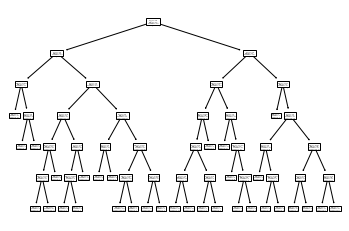

In [35]:
# load necessary package and methods, if you havne't
from sklearn import tree
import matplotlib.pyplot as plt

# plot the tree
tree.plot_tree(tree_model)
# save the plot into a pdf file
plt.savefig('images/tree_model_titanic.pdf')
# show the plot on the screen
plt.show()

<a name="eg2-present2"></a>
#### Presentation: Display a Fancy Decision Tree Model with Class or Label Names

This is not a standard machine learning steps. It shows a visualziation of our decsition tree classification output.

[back to exercise 2](#ex2)

In [39]:
# load necessary package and methods, if you havne't
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

# set the graph
dot_data = export_graphviz(tree_model,
                           filled=True, 
                           rounded=True,
                           class_names=['Not Survived', 
                                        'Survived'],
                           feature_names=feature_cols,
                           out_file=None) 

# create the graph
graph = graph_from_dot_data(dot_data)  

In [40]:
# display the graph
from IPython.display import Image
Image(graph.create_png())

InvocationException: GraphViz's executables not found

Questions:
* Based on the structure of the decision tree built, which feature may play the most importnat role in predictinng the survival of a Titanic passenger? (Hint: which feature is used in the first splitting rule?)

Acknolwedgement: Examples are adapted from textbook Hands-OnMachine Learning with Scikit Learn, Keras, and TensorFlow 2nd edition, textbook Python Machine Learning 3rd edition, and demo in UMASS CS335.

## Exercises

<a name="ex1"></a>
### Exercise 1 - Decision Tree with a Built-in Dataset (wine)

Let build **Decision Tree** classification with **anothe data set "wine"** and predict the class of bottles of wine.
(Please refer back to the [example 1](#eg1))

#### Preprocessing
(Please refer back to the [example 1- preprocess](#eg1-preprocess))

##### Load data

In [ ]:
# load necessary package and methods, if you havne't
from sklearn import datasets
import numpy as np
import pandas as pd

# load "wine" data from sickit-learn


# check the keys


In [ ]:
# checek the data description


In [ ]:
# check the data (features)


In [ ]:
# check the label


In [ ]:
# assign the features and target values to variables


##### Split training samples into training set and test set


In [ ]:
# load necessary package and methods, if you havne't

# split the training data into training set and test set


In [ ]:
# cheking the data


#### Learning - Training a Model
(Please refer back to the [example 1- learning](#eg1-learning))

In [ ]:
# build your decision tree model
# load necessary package and methods, if you havne't

# set the classifier

# fit the classifier from training set


#### Prediction - Using the model trained to make predictions
(Please refer back to the [example 1- predict](#eg1-predict))

Predict the label or class of a wine with these feature values as 12, 2, 1.6, 15, 80, 1.51, 2.17, 0.39, 1.3, 2.4, 1.11, 3.31, 650

In [ ]:
# predict the class of the wine with 13 features as 12, 2, 1.6, 15, 80, 1.51, 2.17, 0.39, 1.3, 2.4, 1.11, 3.31, 650


Predict the label or class of the 10th wine in the test set. Then compare your prediction with the true label or class from the vector of the target values for the test set

In [ ]:
# predict the class of the wine, which is the 10th instance in the test set
# show the features of the 10th wine in the test set


# predict the target value (class) of the 10th wine in the test set use the features of that wine


# compare the true class with the predicted class of the 10th wine in the test set


#### Presentation: Display the Decision Tree Model
This is not a standard machine learning steps. It shows a visualziation of our decsition tree classification output.
(Please refer back to the [example 1- present1](#eg1-present1))

In [ ]:
# load necessary package and methods, if you havne't


# plot the tree

# save the plot into a pdf file

# show the plot on the screen


#### Presentation: Display a Fancy Decision Tree Model with Class or Label Names

This is not a standard machine learning steps. It shows a visualziation of our decsition tree classification output.
(Please refer back to the [example 1- present2](#eg1-present2))

In [ ]:
# load necessary package and methods, if you havne't


# set the graph


# create the graph


In [ ]:
# display the graph


Questions:
* Based on the structure of the decision tree built, which feature may play the most importnat role in predictinng the class of a bottle of wine?

<a name="ex2"></a>
### Exercise 2 - Decision Tree with an Exteranl Dataset (Heart Disease Prediction)

Let build **Decision Tree** classification with **anothe external data set "heart.csv"**


In this exercise, we will apply Decision Tree Classficiation to an external dataset for heart disease prediction.


Please build a predictive model that answers the question: "Whether the presence of heart disease shows in a patient" using the patient data (i.e., age, gender, chest pain type,...) and decision tree learing algorithm. 

<a name="kaggle-heart"></a>
Data source:\
The data are from Kaggle and more details as well as data description can be found at https://www.kaggle.com/ronitf/heart-disease-uci. (The dataset is the "heart.csv" on the website. The labels are in the "target" column.)
(Please refer back to the [example 2](#eg2))

#### Preprocessing
(Please refer back to the [example 2- preprocess](#eg2-preprocess))

##### Load data

In [ ]:
# if you haven't loaded the package before, import the packages and methods

# read csv file into Python


In [ ]:
# double check the loaded data
# dimensions


# data information


# data summary


In [ ]:
# check missing values


# drop rows with missing values, if any


# double check


Note:\
You may want to check the [dropna function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) out.

In [ ]:
# get the features (all of the features. do NOT include the label)


# double check data
# dimensions


# first five lines


Note:\
You may want to check the [drop function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) out.

Questions:
* Which column should you NOT include in the features?

In [ ]:
# if there are no string values needed to be converted, skip this step
# convert categorical variable with string values to numeric values



In [ ]:
# if there are no string values needed to be converted, skip this step
# double check
# first five lines


In [ ]:
# get the target values (which column to use?)


# check the dimension and the unique labels


Questions:
* How many samples do we have in the training set?
* How many features do we have for each sample?
* Which column should you use for the target values?

##### Split training samples into training set and test set

In [ ]:
# load necessary package and methods, if you havne't

# split the training data into training set and test set


In [ ]:
# cheking the data


#### Learning - Training a Decision Tree Classification model
Fit or train a decision tree classification model
(Please refer back to the [example 2- learning](#eg2-learning))

In [ ]:
# build your decision tree model
# load necessary package and methods

# set the classifier

# fit the classifier from training set


#### Prediction

(Please refer back to the [example 2- predict](#eg2-predict))

Predict whether the presence of heart disease shows in a patient with following feature values

 age | sex | cp | trestbps | chol | fbs | restecg | thalach | exang | oldpeak | slope | ca |thal
 --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- 
 53 | 1 | 2 | 135 | 190 | 1 | 0 | 157 | 0 | 1.2 | 0 | 0 | 2

In [ ]:
# predict the presence of heart disease in a patient with the given feature values


Predict whether the presence of heart disease shows in the 10th patient in the test set

In [ ]:
# show the features of the 10th patient in the test set


# predict whether the presence of heart disease shows in the 10th patient in the test set


# compare the true label and predicted label


#### Presentation: Display the Decision Tree Model
This is not a standard machine learning steps. It shows a visualziation of our decsition tree classification output.
(Please refer back to the [example 2- present1](#eg2-present1))

In [ ]:
# load necessary package and methods, if you havne't


# plot the tree

# save the plot into a pdf file

# show the plot on the screen


#### Presentation: Display a Fancy Decision Tree Model with Class or Label Names

This is not a standard machine learning steps. It shows a visualziation of our decsition tree classification output.
(Please refer back to the [example 2- present2](#eg2-present2))

In [ ]:
# load necessary package and methods, if you havne't


# set the graph


# create the graph


Questions:
* What attribute of a DataFrame (the data structure `pandas` package created) can you use to get the column names rather than typing 13 strings one by one for the `feature_names` argument?

In [ ]:
# display the graph


Questions:
* Based on the structure of the decision tree built, which feature may play the most importnat role in predictinng the presence of heart disease in a patient?